In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM ,SimpleRNN,GRU
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [3]:
print('Loading Data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

Loading Data...
17465344/17464789 [==============================] - 0s 0us/step


In [4]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [5]:
y_train[0]

1

In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test = sequence.pad_sequences(x_test, maxlen=80)

In [7]:
model = Sequential()
model.add(Embedding(20000, 256))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         5120000   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 5,645,569
Trainable params: 5,645,569
Non-trainable params: 0
_________________________________________________________________


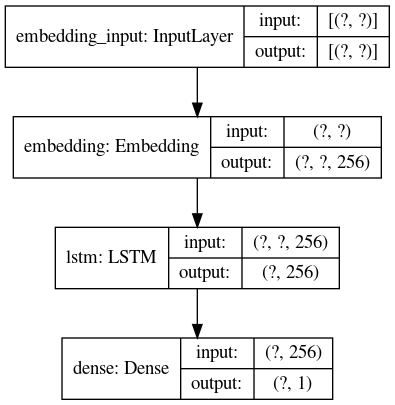

In [9]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
mcp1 = ModelCheckpoint('modelLSTM.h5', verbose=1)

In [12]:
es1 = EarlyStopping(patience=1,verbose=1)

In [13]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          callbacks=[mcp1,es1],
          validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.7898
Epoch 00001: saving model to modelLSTM.h5
782/782 [==============================] - 360s 460ms/step - loss: 0.4426 - accuracy: 0.7898 - val_loss: 0.3637 - val_accuracy: 0.8388
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.8966
Epoch 00002: saving model to modelLSTM.h5
782/782 [==============================] - 359s 460ms/step - loss: 0.2559 - accuracy: 0.8966 - val_loss: 0.3752 - val_accuracy: 0.8383
Epoch 00002: early stopping


In [14]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score LSTM:', score)
print('Test accuracy LSTM:', acc)

782/782 - 40s - loss: 0.3752 - accuracy: 0.8383
Test score LSTM: 0.37522441148757935
Test accuracy LSTM: 0.8383200168609619


In [15]:
regressor = Sequential()
regressor.add(Embedding(20000, 256))
regressor.add(SimpleRNN(256, dropout=0.2, recurrent_dropout=0.2))

regressor.add(Dense(1, activation='sigmoid'))

In [16]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         5120000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 5,251,585
Trainable params: 5,251,585
Non-trainable params: 0
_________________________________________________________________


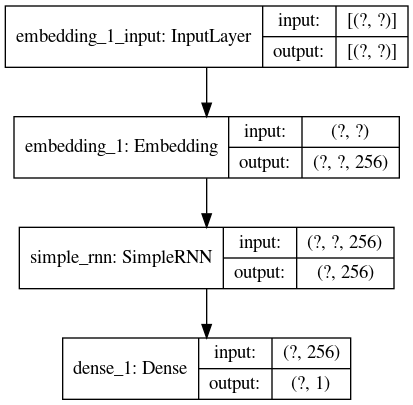

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(regressor, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [18]:
regressor.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
mcp2 = ModelCheckpoint('modelRNN.h5', verbose=1)

In [20]:
es2 = EarlyStopping(patience=1,verbose=1)

In [21]:
regressor.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          callbacks=[mcp2,es2],
          validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.5689
Epoch 00001: saving model to modelRNN.h5
782/782 [==============================] - 99s 126ms/step - loss: 0.6748 - accuracy: 0.5689 - val_loss: 0.6234 - val_accuracy: 0.6389
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.6731
Epoch 00002: saving model to modelRNN.h5
782/782 [==============================] - 102s 131ms/step - loss: 0.5949 - accuracy: 0.6731 - val_loss: 0.5364 - val_accuracy: 0.7408
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.5060 - accuracy: 0.7560
Epoch 00003: saving model to modelRNN.h5
782/782 [==============================] - 98s 125ms/step - loss: 0.5060 - accuracy: 0.7560 - val_loss: 0.6261 - val_accuracy: 0.7059
Epoch 00003: early stopping


In [22]:
score, acc = regressor.evaluate(x_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score RNN :', score)
print('Test accuracy RNN :', acc)

782/782 - 13s - loss: 0.6261 - accuracy: 0.7059
Test score RNN : 0.6260653734207153
Test accuracy RNN : 0.7059199810028076


In [23]:
regressorGRU = Sequential()
regressorGRU.add(Embedding(20000, 256))
regressorGRU.add(GRU(256, dropout=0.2, recurrent_dropout=0.2))

regressorGRU.add(Dense(1, activation='sigmoid'))

In [24]:
regressorGRU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 256)         5120000   
_________________________________________________________________
gru (GRU)                    (None, 256)               394752    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 5,515,009
Trainable params: 5,515,009
Non-trainable params: 0
_________________________________________________________________


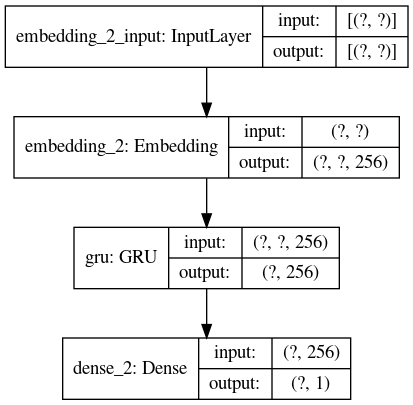

In [25]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(regressorGRU, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [26]:
regressorGRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
mcp3 = ModelCheckpoint('modelGRU.h5', verbose=1)

In [28]:
es3 = EarlyStopping(patience=1,verbose=1)

In [29]:
regressorGRU.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          callbacks=[mcp3,es3],
          validation_data=(x_test, y_test))

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.4548 - accuracy: 0.7778
Epoch 00001: saving model to modelGRU.h5
782/782 [==============================] - 352s 450ms/step - loss: 0.4548 - accuracy: 0.7778 - val_loss: 0.3839 - val_accuracy: 0.8339
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.9038
Epoch 00002: saving model to modelGRU.h5
782/782 [==============================] - 347s 444ms/step - loss: 0.2442 - accuracy: 0.9038 - val_loss: 0.3572 - val_accuracy: 0.8417
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.1297 - accuracy: 0.9529
Epoch 00003: saving model to modelGRU.h5
782/782 [==============================] - 345s 441ms/step - loss: 0.1297 - accuracy: 0.9529 - val_loss: 0.4566 - val_accuracy: 0.8327
Epoch 00003: early stopping


In [30]:
score, acc = regressorGRU.evaluate(x_test, y_test,
                            batch_size=32,
                            verbose=2)
print('Test score GRU :', score)
print('Test accuracy GRU :', acc)

782/782 - 30s - loss: 0.4566 - accuracy: 0.8327
Test score GRU : 0.4565681219100952
Test accuracy GRU : 0.8326799869537354
